In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
train= pd.read_excel('Data_Train.xlsx')

test= pd.read_excel('Test_set.xlsx')

In [4]:
train.head()  #  train dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#  lets check the Train dataset shape
train.shape

(10683, 11)

In [6]:
# it is THE test dataset 
test.head()                ##  in this dataset is not a Price Attribute because we test a model on this dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
#  lets check the test dataset  shape
test.shape

(2671, 10)

In [8]:
#  makeing new because while train the model then dataset easily seperated
test['data']= 'test'   #  

train['data'] = 'train'  #

In [9]:
# Concating the train & test dataset
df = pd.concat([train, test], axis=0, ignore_index=True)  

In [10]:
df.head(6)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,train


In [11]:
# LETS CHECK THE SHAPE OF DATASET
df.shape

(13354, 12)

In [12]:
# lets check the null value
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
data                  0
dtype: int64

In [13]:

#
df.info()     # all columns have object datatype except 'Price'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  data             13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.2+ MB


In [14]:
# this two rows have to be dropped because  Duration time  is too fewer really is not possible 

df[df['Duration']== '5m']  # I found these rows when i was convert 'Duration' VARIABLES into
#   continuous Attributes(hour,min)                 # it is like a outliers 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,data
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327.0,train
13343,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,NaN,test


In [15]:
# 
df.drop([6474, 13343], axis=0 , inplace=True)

In [16]:
# convert 'Duration' column into  hour & minute format

dur= []
for i in df['Duration'].str.split('h'):
    if len(i)==2:
        dur.append(i[0]+'.'+i[1][1:-1])
    else:
        print(i[0])


In [17]:
df['duration_hour']= dur   # made new  column 'duration_hour'

df['duration_hour']= df['duration_hour'].astype(float)   #  Duration datatype change into 'float' from 'object' 
df['duration_hour']= df['duration_hour'] * 60    # change into minute

In [18]:
df['duration_hour'].head()

0     150.0
1     435.0
2    1140.0
3     315.0
4     267.0
Name: duration_hour, dtype: float64

In [19]:
# There is no use keeping the 'Route' column because 'Source', 'Destination' & 'Total-stops' give all
#     information of 'Route' Attribute, so drop this column 

df= df.drop(['Route', 'Duration'], axis=1)

In [22]:
#   10 types of variables in 'Additional_Info' columns
df['Additional_Info'].value_counts()

No info                         10491
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [23]:
#                12 types of variables in 'Airline' Attributes
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2190
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [24]:
#                        5 types of variables in 'Source' Attributes
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       881
Chennai      456
Name: Source, dtype: int64

In [25]:

#                        6 types of variables in 'Destination' Attributes
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     881
Kolkata       456
Name: Destination, dtype: int64

In [26]:

#                        5 types of variables in 'Total_Stops' Attributes
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1897
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [20]:
# making new columns 'year', 'month' & 'day' from 'Date_of_journey'

df['Journey_day']= df['Date_of_Journey'].str.split('/').str[0]
df['Journey_month']= df['Date_of_Journey'].str.split('/').str[1]
#df['Journey_year']= df['Date_of_Journey'].str.split('/').str[2]

df.drop( 'Date_of_Journey', axis=1, inplace=True)

In [21]:

# Making new columns Dep_hour & Dep_minute  from 'Dep_Time' columns

df['Dep_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute']= pd.to_datetime(df['Dep_Time']).dt.minute

#  Making new columns Arrival_hour & Arrival_minute  from  'Arrival_Time' column
df['Arrival_hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_minute']= pd.to_datetime(df['Arrival_Time']).dt.minute

df= df.drop(['Arrival_Time', 'Dep_Time'], axis=1)

In [22]:
#  lets impute null value in 'Total_Stops'
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

In [21]:
# 
df.info()      # journey_day, jpurney_month show obbject but it contain integer so change it datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13352 non-null  object 
 1   Source           13352 non-null  object 
 2   Destination      13352 non-null  object 
 3   Total_Stops      13352 non-null  object 
 4   Additional_Info  13352 non-null  object 
 5   Price            10682 non-null  float64
 6   duration_hour    13352 non-null  float64
 7   Journey_day      13352 non-null  object 
 8   Journey_month    13352 non-null  object 
 9   Dep_hour         13352 non-null  int64  
 10  Dep_minute       13352 non-null  int64  
 11  Arrival_hour     13352 non-null  int64  
 12  Arrival_minute   13352 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 1.4+ MB


In [23]:
df[['Journey_month','Journey_day']] = df[['Journey_month','Journey_day']].astype('int64')

In [24]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,data,duration_hour,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,train,150.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,train,435.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882.0,train,1140.0,9,6,9,25,4,25


In [25]:
# lets check null value again after cleaning the data
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2670
data                  0
duration_hour         0
Journey_day           0
Journey_month         0
Dep_hour              0
Dep_minute            0
Arrival_hour          0
Arrival_minute        0
dtype: int64

In [ ]:
LETS START EDA

<AxesSubplot:xlabel='Source', ylabel='count'>

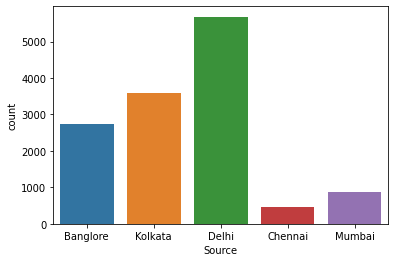

In [33]:
#  LET'S  PLOT THE  COUNTPLOT  OF  'Source'
sns.countplot(df['Source'])

#  in Source , maximum elements are Delhi ,Kolkata & Banglore ,  minimum = chennai

<AxesSubplot:xlabel='Destination', ylabel='count'>

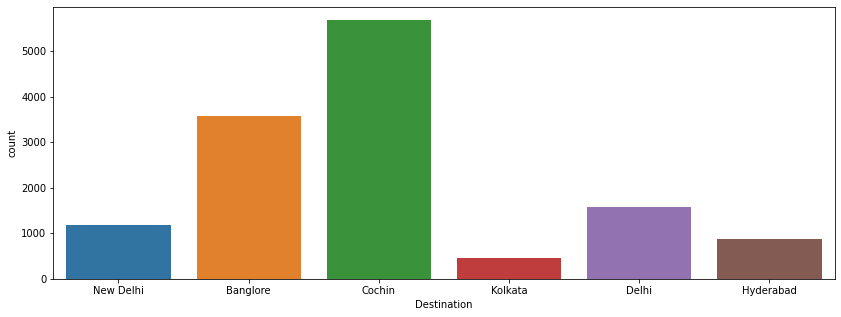

In [34]:
#  PLOTTING  COUNTPLOT  OF  'Destination'
plt.figure(figsize=(14,5))
sns.countplot(df['Destination'])
#  in destination , maximum elements are Cochin & Banglore, minimum = Kolkata

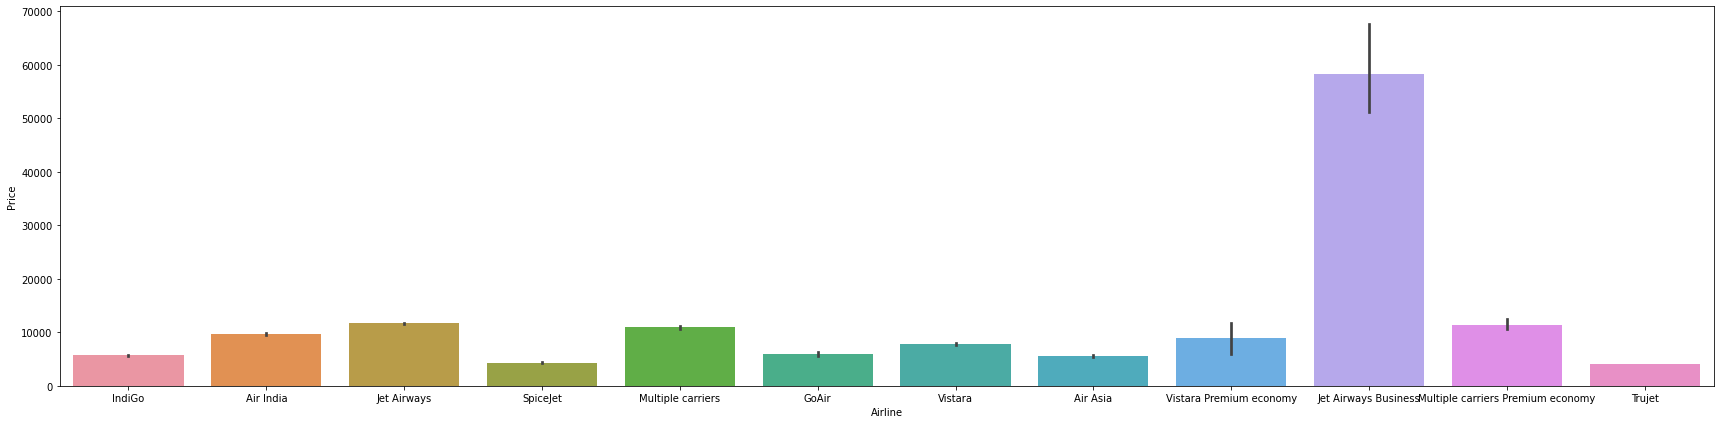

In [35]:
#  plotting Barplot 'Airline' vs 'Price'
plt.figure(figsize=(24,6))
sns.barplot(df['Airline'], df['Price'])
plt.tight_layout()               #  maximum price of 'Jet Airways Business' Airline 
#                                 minimum price of 'Spicejet' & 'Trujet' Airline

In [40]:

df[df['Airline']== 'Jet Airways Business']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,data,duration_hour,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
657,Jet Airways Business,Banglore,New Delhi,1 stop,No info,52229.0,train,5.0,01,03,2019,5,45,10,45
2924,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,79512.0,train,5.4,01,03,2019,5,45,11,25
5372,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,62427.0,train,6.4,01,03,2019,5,45,12,25
7351,Jet Airways Business,Delhi,Cochin,2 stops,No info,46490.0,train,8.2,3,03,2019,20,5,4,25
9715,Jet Airways Business,Delhi,Cochin,2 stops,No info,52285.0,train,8.2,6,03,2019,20,5,4,25
10364,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,57209.0,train,4.4,01,03,2019,9,45,14,25
12485,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,NaN,test,7.3,01,03,2019,5,45,13,15
12502,Jet Airways Business,Banglore,New Delhi,non-stop,No info,NaN,test,2.4,03,03,2019,19,55,22,35


<AxesSubplot:xlabel='Destination'>

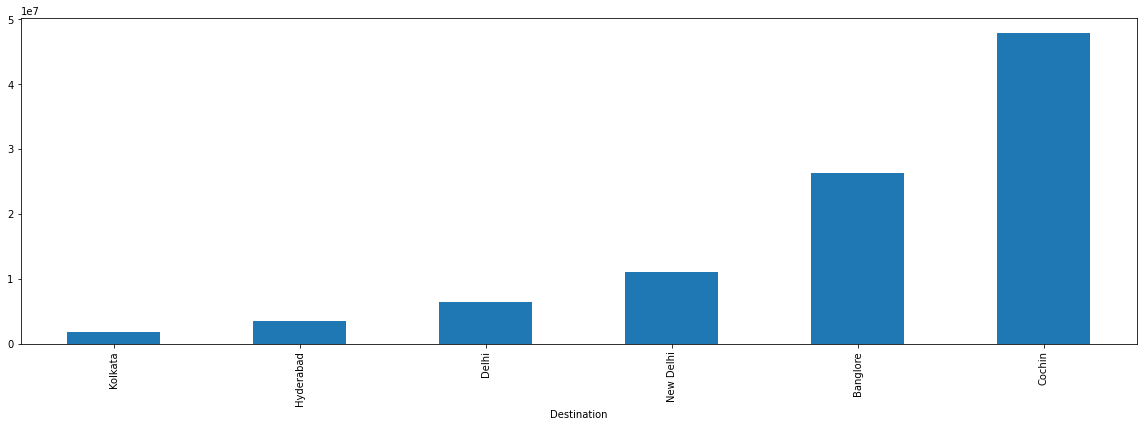

In [43]:
#  

train.groupby(['Destination'])['Price'].sum().sort_values().plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='Journey_month', ylabel='Price'>

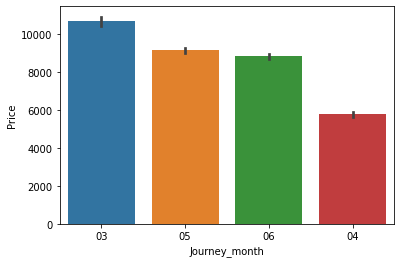

In [52]:
# 
sns.barplot(df['Journey_month'],df['Price'])

<AxesSubplot:xlabel='Airline'>

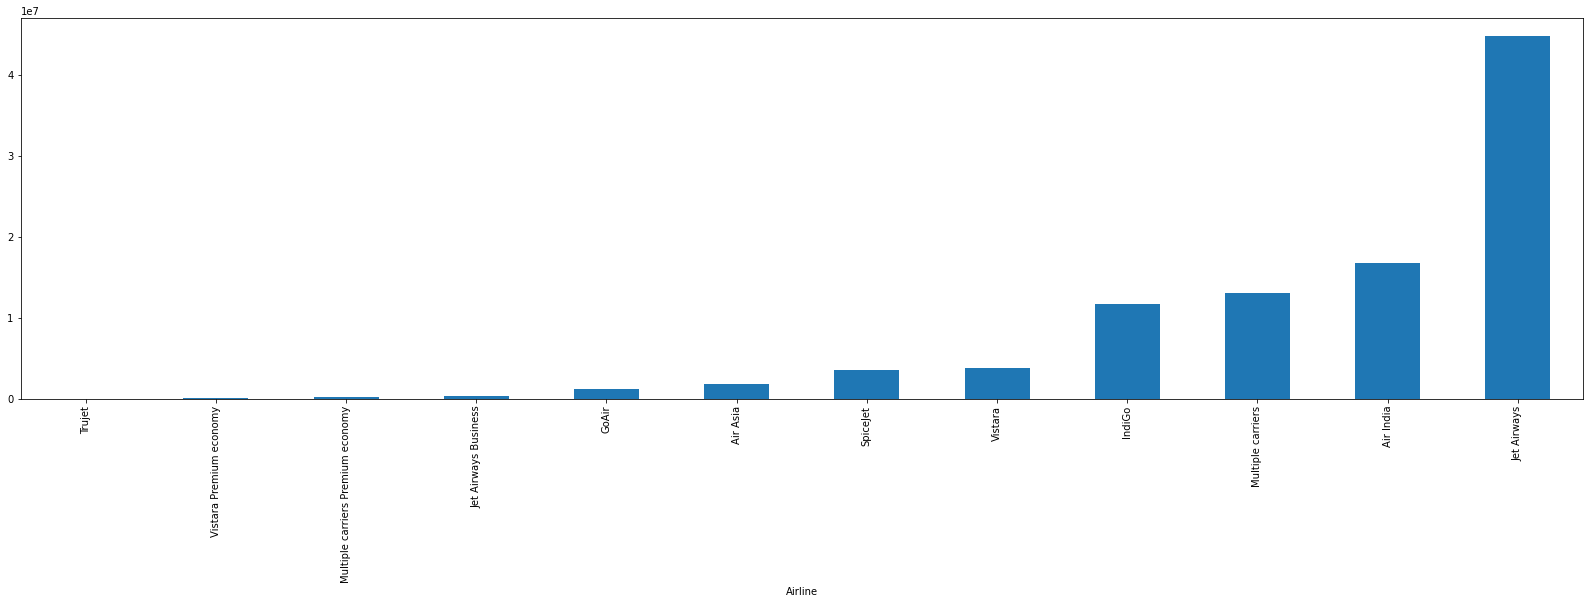

In [56]:
# CHECKING WHICH AIRLINE COLLECT MAXIMUM FARE-PRICE IN ONE YEAR =  JET AIRWAYS

df.groupby(['Airline'])['Price'].sum().sort_values().plot(kind='bar', figsize=(28,7))

In [57]:
df.groupby(['Airline'])['Price'].sum().sort_values()   # without visualization 

Airline
Trujet                                   4140.0
Vistara Premium economy                 26887.0
Multiple carriers Premium economy      148445.0
Jet Airways Business                   350152.0
GoAir                                 1137045.0
Air Asia                              1783293.0
SpiceJet                              3548717.0
Vistara                               3734451.0
IndiGo                               11648071.0
Multiple carriers                    13039603.0
Air India                            16821514.0
Jet Airways                          44817461.0
Name: Price, dtype: float64

<AxesSubplot:xlabel='Airline,Journey_month'>

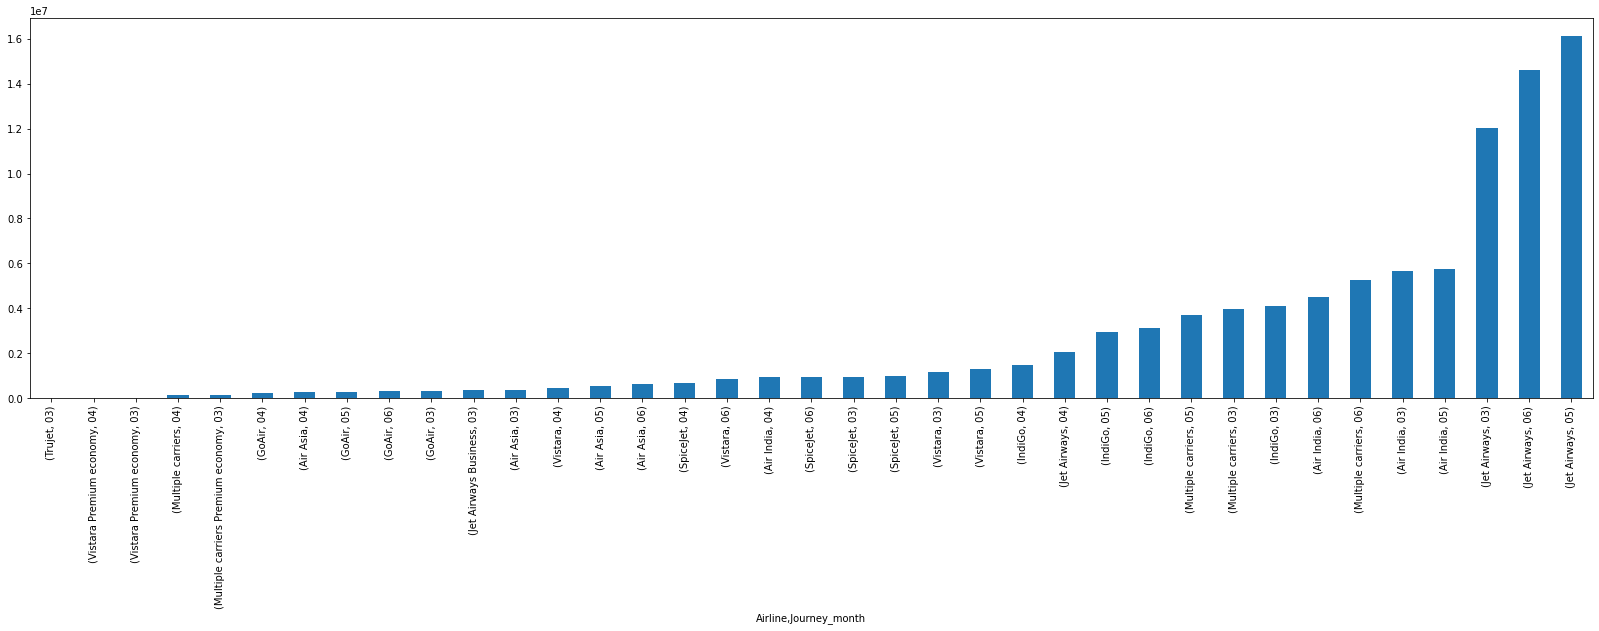

In [58]:
df.groupby(['Airline','Journey_month'])['Price'].sum().sort_values().plot(kind='bar', figsize=(28,7))

In [64]:
#
train[train['Airline']=='Jet Airways'].shape

(3849, 12)

<AxesSubplot:xlabel='Price', ylabel='duration_hour'>

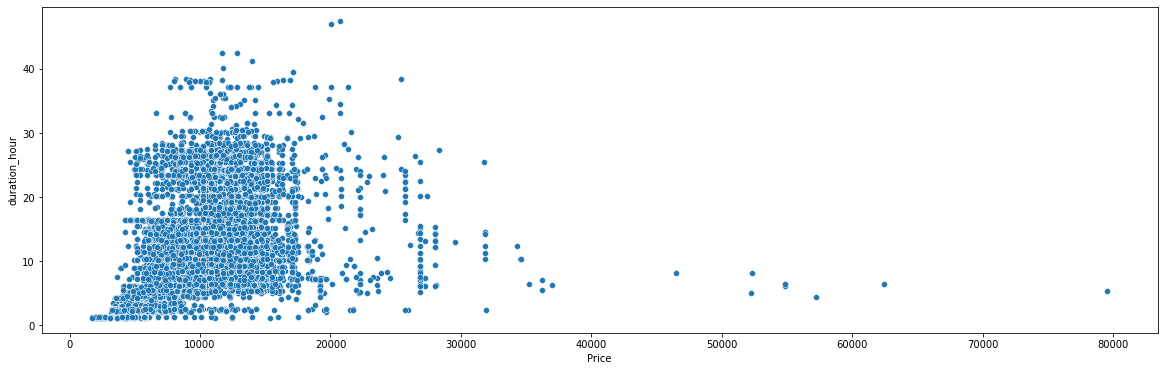

In [80]:
#  plotting Scatterplot 'Price' vs 'duration_hour'
plt.figure(figsize=(20,6))
sns.scatterplot(df['Price'], df['duration_hour'])
#  'Price' vs 'duration_hour' in this Attributes no seen any relation, it is randomly distributed with each other

In [ ]:


lets apply LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.select_dtypes(include='object').columns:
    d = le.fit_transform(df[i]) 
    df[i]=d

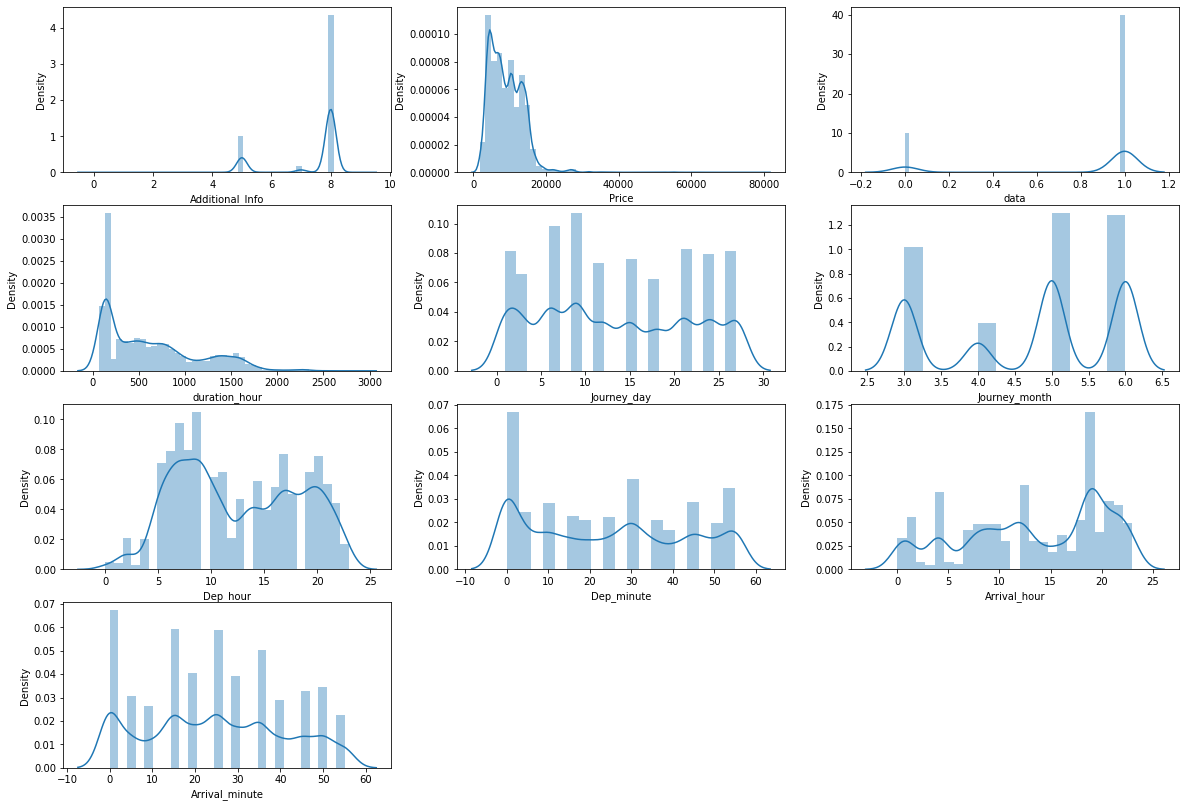

In [45]:
#
# lets see how is data distributed for every columns  / CHECK DATA IS NORMAL DISTRIBUTED OR NOT
plt.figure(figsize=(20,14),)
p=1
for col in df.iloc[:,4:]:
    if p <=10:
        ax = plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [28]:


# LETS  CHECK SKEWNESS
print(df['duration_hour'].skew())
df['duration_hour']= np.sqrt(df['duration_hour'])

0.8613041981889196


<AxesSubplot:>

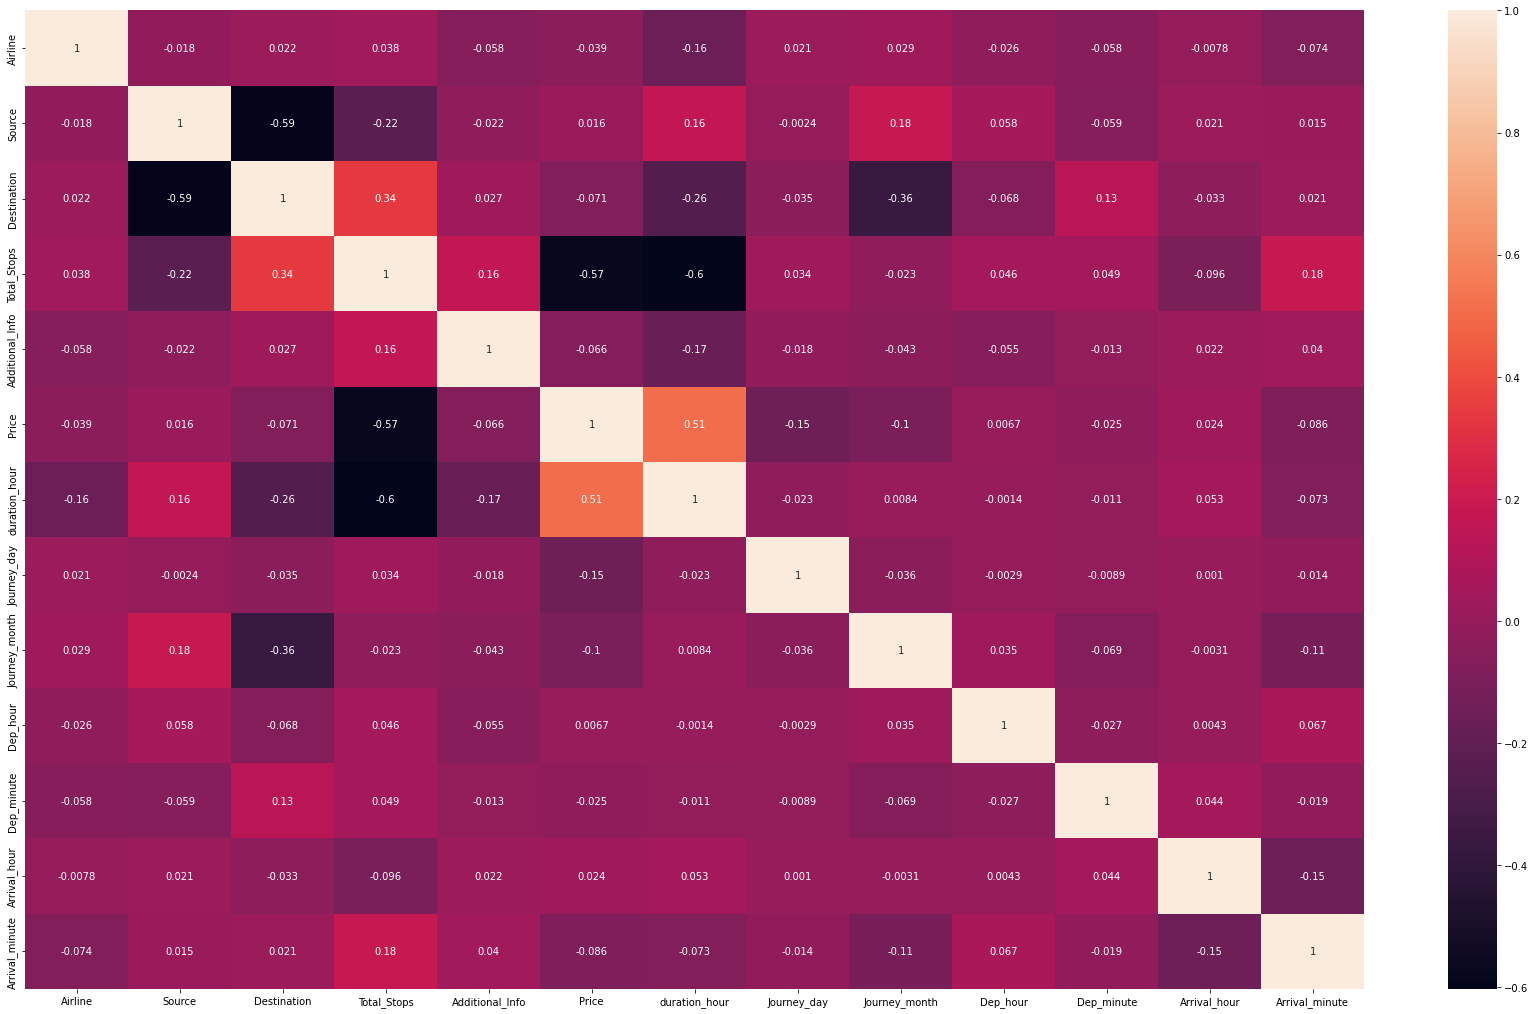

In [31]:


# plotting heatmap of  Dataset Correlation
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# none of the Attributes have positive correlated with target attributes except  'duration_hour'
 # in this dataset not present any relation between input-data and target

In [47]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,data,duration_hour,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,3,0,5,4,8,3897.0,1,150.0,24,3,22,20,1,10
1,1,3,0,1,8,7662.0,1,435.0,1,5,5,50,13,15
2,4,2,1,1,8,13882.0,1,1140.0,9,6,9,25,4,25
3,3,3,0,0,8,6218.0,1,315.0,12,5,18,5,23,30
4,3,0,5,0,8,13302.0,1,267.0,1,3,16,50,21,35


In [29]:
dc= df[df['data']==1]    #  now seperate the train dataset from cconcate data  for training the model
dc.drop('data', axis=1, inplace=True)

x= dc.drop('Price', axis=1 )                # Input-Data
y= dc.Price                                     #  Target-Attribute

In [30]:
x.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,duration_hour,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,3,0,5,4,8,12.247449,24,3,22,20,1,10
1,1,3,0,1,8,20.856654,1,5,5,50,13,15


In [31]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #

#  no multicollinearity problem in this dataset, but 'Additional_Info' show multicollinearity

,features,vif_value
0,Airline,3.728377
1,Source,5.362839
2,Destination,3.099317
3,Total_Stops,3.553766
4,Additional_Info,24.167098
5,duration_hour,10.278840
6,Journey_day,3.437423
7,Journey_month,15.627566
8,Dep_hour,5.577368
9,Dep_minute,2.718450


In [32]:

from sklearn.model_selection import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [33]:
sc= StandardScaler()
scaled= sc.fit_transform(x)
scaled= pd.DataFrame(scaled, columns=x.columns)

In [34]:
#   MAKE FUNCTION FOR BEST RANDOM_STATE ,       IN TRAINING PROCESS           # finding best random_state

def max_score(model,scaled,y):
    maxf= 0
    rs= 0
    for r_state in range(50,100):
        x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.30,)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        tmp=r2_score(y_test,y_pred)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum r2_score is at random state :",rs," and it is :",maxf)

In [35]:
#
# 
kfold= KFold(n_splits=20, shuffle=True, random_state=59)

def model_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    pred= model.predict(x_train)
    y_pred= model.predict(x_test)
    print('training_score =', r2_score(y_train,pred))
        
    print('test_r2_score=', r2_score(y_test,y_pred))
    print('mean_squared_error =', mean_squared_error(y_test,y_pred))
    print('mean_absolute_error= ', mean_absolute_error(y_test, y_pred))
    print('root_mean_squared_error =', np.sqrt(mean_squared_error(y_test,y_pred)))


def cross_val(model,x_train,y_train,algo):
        
    cv_score= cross_val_score(model,x_train,y_train,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [36]:
                                                  ###  LETS USE LINEAR-REGRESSION TO TRAIN & TEST THE MODEL
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
max_score(lr, scaled, y)

maximum r2_score is at random state : 50  and it is : 0.44504938106870706
maximum r2_score is at random state : 51  and it is : 0.44796070285722134
maximum r2_score is at random state : 59  and it is : 0.451492150075939
maximum r2_score is at random state : 64  and it is : 0.4726407807710278


In [37]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 64,test_size=0.30,)
model_score(lr,x_train,y_train,x_test,y_test)

training_score = 0.4134324465440149
test_r2_score= 0.4726407807710278
mean_squared_error = 9792164.492165362
mean_absolute_error=  2402.617858990015
root_mean_squared_error = 3129.243437664344


In [38]:

                                                ###  LETS USE RANDOMFOREST-REGRESSOR TO TRAIN & TEST THE MODEL
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
max_score(rf, scaled, y)

maximum r2_score is at random state : 50  and it is : 0.875073703150962
maximum r2_score is at random state : 58  and it is : 0.8883335240899563
maximum r2_score is at random state : 67  and it is : 0.8888354236175645
maximum r2_score is at random state : 77  and it is : 0.9087424574206714


In [81]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 77,test_size=0.30,)
model_score(rf , x_train,y_train,x_test,y_test)

training_score = 0.9749822375847091
test_r2_score= 0.9068181531608177
mean_squared_error = 1876987.5839651397
mean_absolute_error=  682.4746614753508
root_mean_squared_error = 1370.0319645778852


In [84]:

                                               # ## LETS USE ADABOOST-REGRESSOR TO TRAIN & TEST THE MODEL
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor(n_estimators=280, learning_rate=0.13,)
max_score(ad, scaled, y)

maximum r2_score is at random state : 50  and it is : 0.45943376628539734
maximum r2_score is at random state : 53  and it is : 0.5437837021098403
maximum r2_score is at random state : 54  and it is : 0.5875985338724494
maximum r2_score is at random state : 56  and it is : 0.598967039894498


In [85]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 56,test_size=0.30,)
model_score(ad , x_train,y_train,x_test,y_test)

training_score = 0.6122567288312972
test_r2_score= 0.5885226118882492
mean_squared_error = 9554640.114791662
mean_absolute_error=  2266.2722344854974
root_mean_squared_error = 3091.0580898442627


In [82]:

                                        #  LETS USE GRADIENTBOOSTING-REGRESSOR TO TRAIN & TEST THE MODEL
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
max_score(gb, scaled, y)

maximum r2_score is at random state : 50  and it is : 0.7924391626385061
maximum r2_score is at random state : 51  and it is : 0.8060209342984838
maximum r2_score is at random state : 54  and it is : 0.8184428508715557
maximum r2_score is at random state : 58  and it is : 0.8225618194797428
maximum r2_score is at random state : 62  and it is : 0.833249709832987
maximum r2_score is at random state : 75  and it is : 0.8390998966849382


In [83]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 75,test_size=0.30,)
model_score(gb , x_train,y_train,x_test,y_test)

training_score = 0.811187707985181
test_r2_score= 0.8372473522793205
mean_squared_error = 3598777.3387251603
mean_absolute_error=  1237.2687878933048
root_mean_squared_error = 1897.0443692030929


In [39]:

                                            ###  LETS USE  KNN-REGRESSOR TO TRAIN & TEST THE MODEL
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
max_score(knn , scaled, y)

maximum r2_score is at random state : 50  and it is : 0.5924879954961246
maximum r2_score is at random state : 51  and it is : 0.6101366471500118
maximum r2_score is at random state : 58  and it is : 0.6201811440371523
maximum r2_score is at random state : 64  and it is : 0.6402563328933979


In [275]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 64,test_size=0.30,)
knn = KNeighborsClassifier(n_neighbors= 4, )
model_score(knn , x_train,y_train,x_test,y_test)

training_score = 0.7617275084554171
test_r2_score= 0.7079604074283756
mean_squared_error = 5422678.933853354
mean_absolute_error=  1099.3294851794071
root_mean_squared_error = 2328.6646245978304


In [ ]:

LETS USE CROSS VALIDATION 

In [101]:

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 64,test_size=0.30,)
cross_val(lr,x_train,y_train, 'lOGISTIC-REGRESSION')                      ##  cross-validation-score   lOGISTIC-REGRESSION
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(scaled, y ,random_state = 80,test_size=0.30,)
cross_val(gb,x_train,y_train, 'GradientBoosting-Regressor')            ##   cross-validation GRADIENTBOOSTING-REGRESSOR
print('*'*20)

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 56,test_size=0.30,)
cross_val(ad ,x_train,y_train,'AdaBoost-Regressor')                    ##   cross-validation   ADABOOST-REGRESSOR
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 90,test_size=0.30,)
cross_val(rf,x_train,y_train, 'RandomForest_Regressor')                     ##  cross-validation    RANDOMFOREST-REGRESSOR



cross_val_score with lOGISTIC-REGRESSION = 0.4096186429121338
********************
cross_val_score with GradientBoosting-Regressor = 0.7937213473245095
********************
cross_val_score with AdaBoost-Regressor = 0.5599060950507899
********************
cross_val_score with RandomForest_Regressor = 0.8832036350373702


In [ ]:
. we got maximum r2_score from RANDOMfOREST_REGRESSION MODEL and its cross_validation_score was also highest in all models
   so I apply HyperParameter tunning on this model

In [53]:

#  HYPERPARAMATER TUNING   with                '''' RANDOMFOREST-REGRESSOR''''

x_train, x_test,y_train,y_test= train_test_split(scaled, y, test_size=0.30, random_state= 80)
param= {'n_estimators':[180, 280],'max_depth':[11,14,19] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
grid = GridSearchCV(rf ,param, cv=kfold,scoring='r2', n_jobs=-1)

grid.fit(x_train,y_train)
print('best_parameter=', grid.best_params_ ,'\n')

best_parameter= {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 280} 



In [55]:
x_train, x_test,y_train,y_test= train_test_split(scaled, y, test_size=0.30, random_state= 77)
G_RF = RandomForestRegressor(max_depth=19,n_estimators=280,oob_score=True,min_samples_leaf=2 )
G_RF.fit(x_train, y_train)
pred2 = G_RF.predict(x_test)

print('r2_score=', r2_score(y_test, pred2))
print('mean_square_error = ', mean_squared_error(y_test, pred2), '\n') 
print('mean_absolute_error = ', mean_absolute_error(y_test, pred2), '\n')
print('root_mean_square_error =', np.sqrt(mean_squared_error(y_test, pred2)))

r2_score= 0.9048342501098077
mean_square_error =  1916949.8890798173 

mean_absolute_error =  695.4255181965051 

root_mean_square_error = 1384.5395946233598


In [41]:
# IT IS PRICE VARIABLES OF TEST-DATA 
sample= pd.read_excel('Sample_submission.xlsx')


In [50]:
#  test data after Data-Preprocessed 
df[df['data']==0].head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,data,duration_hour,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
10683,4,2,1,0,8,NaN,0,25.159491,6,6,17,30,4,25
10684,3,3,0,0,8,NaN,0,15.491933,12,5,6,20,10,20
10685,4,2,1,0,5,NaN,0,37.509999,21,5,19,15,19,0
10686,6,2,1,0,8,NaN,0,27.928480,21,5,8,0,21,0
10687,0,0,2,4,8,NaN,0,12.247449,24,6,23,55,2,45


In [51]:
Test_data= df[df['data']==0]  # WE SEPERATE THE TEST DATA  FROM FROM DATASET

Test_data = Test_data.drop(['Price','data'], axis=1)
Test_data.shape

(2670, 12)

In [52]:
scaled2 = sc.fit_transform(Test_data)                            #  SCALING THE TEST-DATA
scaled2 = pd.DataFrame(scaled2, columns=Test_data.columns)
scaled2.shape

(2670, 12)

In [59]:
predict2= G_RF.predict(scaled2)

In [104]:
ind= range(0,2670)
d = pd.DataFrame({'predict':predict2})
d2 = pd.DataFrame(sample, index=ind)
result= pd.concat([d, d2],axis=1, ignore_index=True )

In [109]:
result.rename(columns={0:'predict',1:'Price'}, inplace=True)


result

,predict,Price
0,14694.873214,15998
1,4249.608333,16612
2,12896.840476,25572
3,10859.054902,25778
4,3787.204919,16934
5,10262.375000,21051
6,10642.451484,17813
7,6559.163179,16060
8,4578.581905,16230
9,14382.330125,20533


In [110]:
#    SAVE THE MODEL

import pickle
#  save the  hypertunned Randomforest model

In [111]:
Flight_price_prediction = 'Flight_price_prediction.pickle'

pickle.dump(G_RF,open(Flight_price_prediction, 'wb'))
model= pickle.load(open(Flight_price_prediction, 'rb'))

In [ ]:
..   DATA PREPROCESSING
In this dataset have no null value . (Duration, arrival. departture, date-journey) these columns are
 related to date_time so from these columns we creating new columns & in duration columns we found some Outliers
after that we removed those rows 
visualization part
.plotting countplot of categorical columns & all columns are categorical datatype of this dataset except target(Price)

.plotting barplot on categorical columns vs Price then we se that total fare price of Jet_Airways Airline is maximum 
  compare to all airlines companys   and highest fare price of (Jet Airways business) Airline, 
    lowest fare price of (Spicejet, Truejet) Airline
. only Duration column is positive correlated to Price 
. PLOTTING CORRELATION PLOT 
. APPLY LABEL-ENCODER ON CATEGORICAL VARIABLES 
. CHECHING SKEWNESS, OUTLIERS ON CONTINUOUS VARIABLES
. CHECKING MULTICOLLINEARITY  PROBLEM 


.   scaling the dataset
........

TRAIN THE MODEL

. In this Dataset have only ten columns  and  no continuous Attributes in this dataset except Target-Attributes(Price)
   therefore I don't use  Feature-Selection, PCA method 

. train & test the model with four algorithm (linear-regression, adaboost, randomforest, gradientboosting & KNN) .
. using  cross_validation with all model , Randomforest model cross_validation_score=  88 percent 

. we got maximum r2_score from RANDOMfOREST_REGRESSION MODEL and its cross_validation_score was also highest in all models
   so I apply HyperParameter tunning on this model

    
. r2_score of RANDOMFOREST model is 90 percent & cross_validation_score is 80 percent so why huge difference of 
     predicted value from original value Because in this dataset have no any Variables which positive correlated with Target so
     predicted value differ from original value , if in regression problem input-data will positive correlated with Target ,
        then predicted value not much differ from original value